In [2]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-8.671588978654938 -109.04687730575895
71.02266370750269 -58.549424132701475
0.2116981846146473 -58.2431289929477
32.08747293814099 145.56792288349118
-24.904474095659694 -144.12712016517509
86.51562562620043 83.69541964861457
18.93345214314452 32.28756272585821
8.32766457023969 149.0569668214883
70.09625192094995 -143.90131003604506
-21.683164939721365 -129.84940064350587
-49.35301194007295 168.13116775646319
85.25197934168992 -18.250008430862295
60.00734574943013 142.13948313737546
34.1423851495298 -35.93604591660221
-32.461130667507845 119.42120978730412
11.816436266249795 -176.51903686442014
-50.02587528766985 -175.35476849240482
35.54959030114787 -110.11164005798315
-87.37777095286538 79.38561297771037
33.518949584012304 -175.50911947855573
-18.396408882742392 100.17636431772854
26.622497898327055 -3.6383057657370728
34.378527484566916 111.03078704165131
-24.844693210335663 55.26337644000242
-3.1767556215815063 -147.51578982930766
-81.45741691959516 -108.9703844338586
-70.22598969

-13.120893215274208 3.2357901963302993
-28.281151715853042 129.87859284027996
-42.42290006462883 47.95713313692548
34.62045976109296 -29.028620004016688
-17.364404708968877 108.31016402972784
-27.509481643522065 35.171221932647654
66.94308023496734 105.62736200868443
88.51880955274834 5.781060977001147
-84.50427950587151 146.26750371635728
-19.21661141566824 -130.13412052129675
-44.84723183051145 163.76733898968712
-32.932419260190564 -152.77322288824564
-34.97533313345891 -2.52234820659217
-76.90185884065039 10.527099502653812
-82.97637941889441 150.71631848091698
-45.12780689026134 -51.82832722994138
-16.655406421756922 150.74278515212927
23.367939622849846 -84.46670684813822
-85.20270884552775 81.51782973254745
-2.498314231667351 138.66344020986935
85.86185193078839 132.29695944564503
0.023632363451696392 143.79239272039615
-9.317215411573102 -31.68906380258511


In [6]:
from citipy import citipy

In [7]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

586

In [8]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [10]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=fc31d96c292d2d80ad9e9be68cb66981


In [9]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime


In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")
# Create counters.
record_count = 1
set_count = 1
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | troitsko-pechorsk
Processing Record 2 of Set 1 | rikitea
Processing Record 3 of Set 1 | green valley
Processing Record 4 of Set 1 | bluff
Processing Record 5 of Set 1 | khatanga
Processing Record 6 of Set 1 | mataura
Processing Record 7 of Set 1 | cukai
Processing Record 8 of Set 1 | punta arenas
Processing Record 9 of Set 1 | ushuaia
Processing Record 10 of Set 1 | dikson
Processing Record 11 of Set 1 | nador
Processing Record 12 of Set 1 | dingle
Processing Record 13 of Set 1 | bandarbeyla
Processing Record 14 of Set 1 | bitung
Processing Record 15 of Set 1 | georgetown
Processing Record 16 of Set 1 | butaritari
Processing Record 17 of Set 1 | hamilton
Processing Record 18 of Set 1 | mo i rana
Processing Record 19 of Set 1 | mar del plata
Processing Record 20 of Set 1 | albany
Processing Record 21 of Set 1 | tiksi
Processing Record 22 of Set 1 | arraial do cabo
Processing Record 23 of Set 1 | b

Processing Record 39 of Set 4 | thompson
Processing Record 40 of Set 4 | aquin
Processing Record 41 of Set 4 | olinda
Processing Record 42 of Set 4 | gat
Processing Record 43 of Set 4 | angoche
Processing Record 44 of Set 4 | antofagasta
Processing Record 45 of Set 4 | lagoa
Processing Record 46 of Set 4 | puerto escondido
Processing Record 47 of Set 4 | touros
Processing Record 48 of Set 4 | upernavik
Processing Record 49 of Set 4 | asau
Processing Record 50 of Set 4 | jaisalmer
Processing Record 1 of Set 5 | sompeta
Processing Record 2 of Set 5 | chuy
Processing Record 3 of Set 5 | karaton
Processing Record 4 of Set 5 | noshiro
Processing Record 5 of Set 5 | roebourne
Processing Record 6 of Set 5 | walvis bay
Processing Record 7 of Set 5 | duzce
Processing Record 8 of Set 5 | beloha
Processing Record 9 of Set 5 | wah
Processing Record 10 of Set 5 | miramar
Processing Record 11 of Set 5 | srednekolymsk
Processing Record 12 of Set 5 | hasaki
Processing Record 13 of Set 5 | padang
Proce

Processing Record 28 of Set 8 | aktas
Processing Record 29 of Set 8 | andenes
Processing Record 30 of Set 8 | amapa
Processing Record 31 of Set 8 | eureka
Processing Record 32 of Set 8 | constitucion
Processing Record 33 of Set 8 | buluang
Processing Record 34 of Set 8 | shubarkuduk
Processing Record 35 of Set 8 | kamaishi
Processing Record 36 of Set 8 | braslav
City not found. Skipping...
Processing Record 37 of Set 8 | nuevo progreso
Processing Record 38 of Set 8 | beroroha
Processing Record 39 of Set 8 | uchiza
Processing Record 40 of Set 8 | pringsewu
Processing Record 41 of Set 8 | ferrol
Processing Record 42 of Set 8 | sitka
Processing Record 43 of Set 8 | waverly
Processing Record 44 of Set 8 | lorengau
Processing Record 45 of Set 8 | matay
Processing Record 46 of Set 8 | saint-quentin
Processing Record 47 of Set 8 | avera
Processing Record 48 of Set 8 | hobyo
Processing Record 49 of Set 8 | dalby
Processing Record 50 of Set 8 | ust-kuyga
Processing Record 1 of Set 9 | terre hau

Processing Record 17 of Set 12 | yambio
Processing Record 18 of Set 12 | aswan
Processing Record 19 of Set 12 | umzimvubu
City not found. Skipping...
Processing Record 20 of Set 12 | tacuarembo
Processing Record 21 of Set 12 | buzmeyin
Processing Record 22 of Set 12 | ostersund
Processing Record 23 of Set 12 | bloomsburg
Processing Record 24 of Set 12 | cody
Processing Record 25 of Set 12 | calipan
Processing Record 26 of Set 12 | guymon
Processing Record 27 of Set 12 | bouza
Processing Record 28 of Set 12 | posse
Processing Record 29 of Set 12 | amahai
Processing Record 30 of Set 12 | sabha
Processing Record 31 of Set 12 | ola
Processing Record 32 of Set 12 | chake chake
Processing Record 33 of Set 12 | hirara
Processing Record 34 of Set 12 | gorontalo
Processing Record 35 of Set 12 | do gonbadan
Processing Record 36 of Set 12 | morristown
Processing Record 37 of Set 12 | saint anthony
Processing Record 38 of Set 12 | fare
Processing Record 39 of Set 12 | zolotinka
City not found. Ski

In [11]:
len(city_data)

565

In [12]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Troitsko-Pechorsk,62.7084,56.1964,67.32,71,79,2.80,RU,2022-07-09 03:09:11
1,Rikitea,-23.1203,-134.9692,74.28,81,100,21.45,PF,2022-07-09 03:09:11
2,Green Valley,31.8543,-110.9937,99.37,15,17,7.85,US,2022-07-09 03:05:08
3,Bluff,-46.6000,168.3333,43.81,61,100,26.80,NZ,2022-07-09 03:09:11
4,Khatanga,71.9667,102.5000,46.31,90,100,12.82,RU,2022-07-09 03:09:12
5,Mataura,-46.1927,168.8643,43.48,94,100,8.46,NZ,2022-07-09 03:09:12
6,Cukai,4.2500,103.4167,86.40,63,90,3.51,MY,2022-07-09 03:09:12
7,Punta Arenas,-53.1500,-70.9167,33.91,100,100,11.50,CL,2022-07-09 03:09:13
8,Ushuaia,-54.8000,-68.3000,31.66,80,100,19.57,AR,2022-07-09 03:07:52
9,Dikson,73.5069,80.5464,33.91,88,100,9.84,RU,2022-07-09 03:09:13


In [15]:
new_column_order = ["City", "Country", "Date","Lat","Lng", "Max Temp", "Humidity","Cloudiness", "Wind Speed"]

In [17]:
city_data_df = city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Troitsko-Pechorsk,RU,2022-07-09 03:09:11,62.7084,56.1964,67.32,71,79,2.80
1,Rikitea,PF,2022-07-09 03:09:11,-23.1203,-134.9692,74.28,81,100,21.45
2,Green Valley,US,2022-07-09 03:05:08,31.8543,-110.9937,99.37,15,17,7.85
3,Bluff,NZ,2022-07-09 03:09:11,-46.6000,168.3333,43.81,61,100,26.80
4,Khatanga,RU,2022-07-09 03:09:12,71.9667,102.5000,46.31,90,100,12.82


In [19]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [21]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

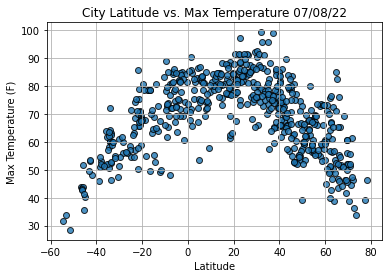

In [22]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

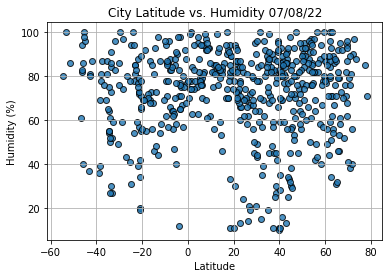

In [23]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

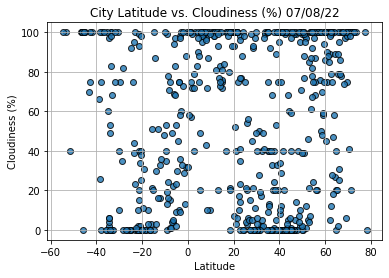

In [24]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

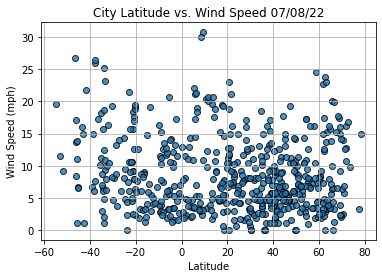

In [25]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.

In [27]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [28]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Troitsko-Pechorsk,RU,2022-07-09 03:09:11,62.7084,56.1964,67.32,71,79,2.80
2,Green Valley,US,2022-07-09 03:05:08,31.8543,-110.9937,99.37,15,17,7.85
4,Khatanga,RU,2022-07-09 03:09:12,71.9667,102.5000,46.31,90,100,12.82
6,Cukai,MY,2022-07-09 03:09:12,4.2500,103.4167,86.40,63,90,3.51
9,Dikson,RU,2022-07-09 03:09:13,73.5069,80.5464,33.91,88,100,9.84
...,...,...,...,...,...,...,...,...,...
558,Yumen,CN,2022-07-09 03:24:22,40.2833,97.2000,83.75,11,34,12.26
559,Marinette,US,2022-07-09 03:24:22,45.1000,-87.6307,61.29,72,0,5.75
561,Batagay-Alyta,RU,2022-07-09 03:24:23,67.8006,130.4114,51.06,70,100,6.46
563,Marshall,US,2022-07-09 03:23:29,34.3834,-86.3333,85.39,84,0,4.61


In [29]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Troitsko-Pechorsk,RU,2022-07-09 03:09:11,62.7084,56.1964,67.32,71,79,2.80
2,Green Valley,US,2022-07-09 03:05:08,31.8543,-110.9937,99.37,15,17,7.85
4,Khatanga,RU,2022-07-09 03:09:12,71.9667,102.5000,46.31,90,100,12.82
6,Cukai,MY,2022-07-09 03:09:12,4.2500,103.4167,86.40,63,90,3.51
9,Dikson,RU,2022-07-09 03:09:13,73.5069,80.5464,33.91,88,100,9.84


In [30]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

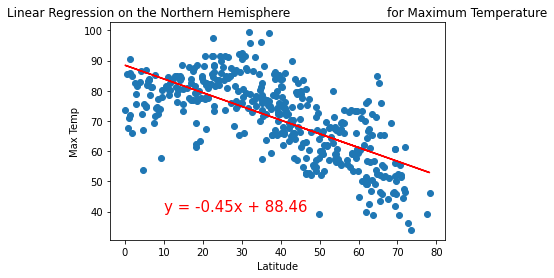

In [31]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

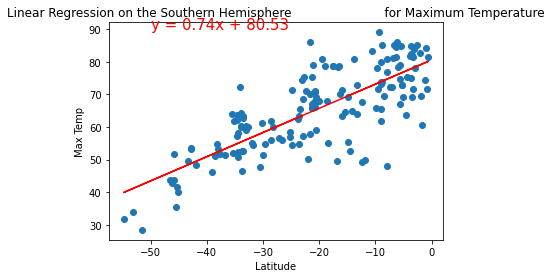

In [37]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                       for Maximum Temperature', 'Max Temp',(-50,90))

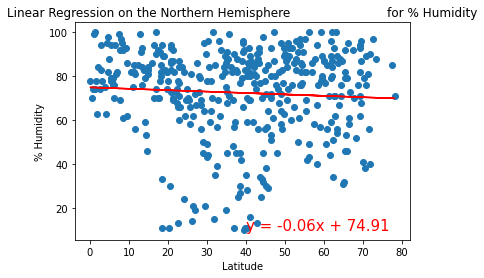

In [38]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

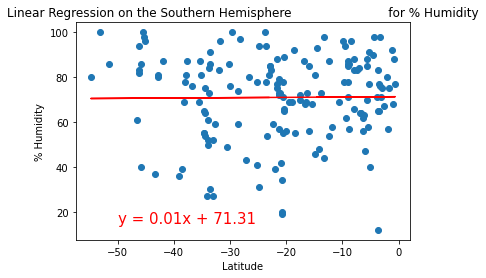

In [39]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

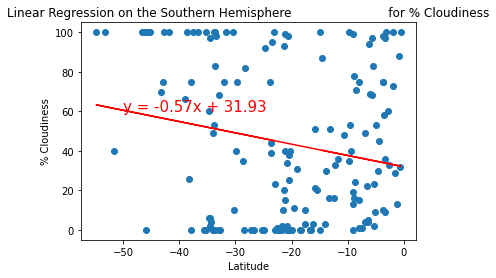

In [40]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

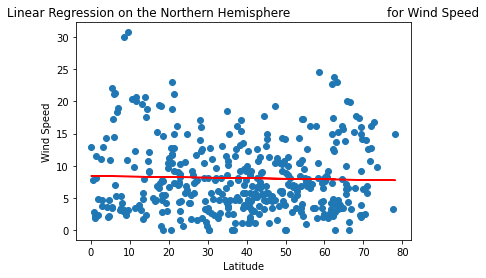

In [41]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

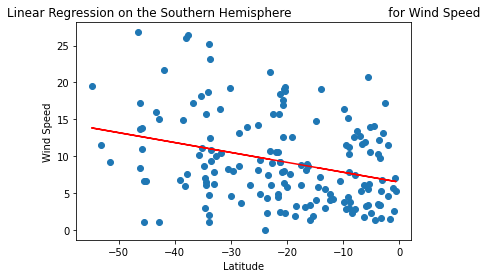

In [42]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))